<a href="https://colab.research.google.com/github/he-ale/data-science/blob/main/AutoMPG/AutoMPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
auto_mpg = fetch_ucirepo(id=9)

In [ ]:
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [ ]:
dataframe= X.join(y)

In [ ]:
dataframe

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


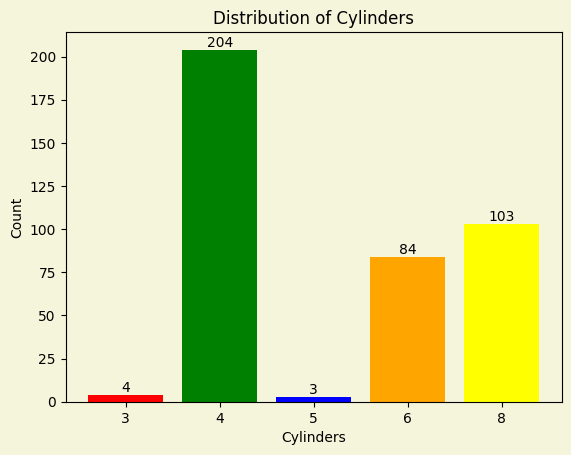

In [ ]:
labels= dataframe.groupby('cylinders').count().index.astype(str)
cylinders= dataframe.groupby('cylinders').count()['mpg']

fig, ax = plt.subplots()
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')
bars= ax.bar(labels, cylinders, color=['red', 'green', 'blue', 'orange', 'yellow'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Count')
ax.set_title('Distribution of Cylinders')
for bar in bars:
    height= bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.show()

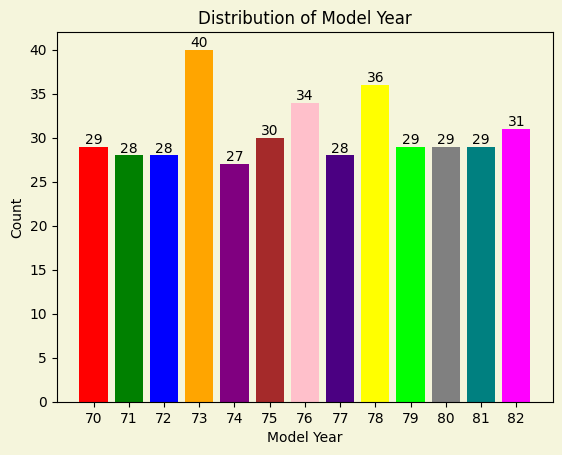

In [ ]:
model_year= dataframe.groupby('model_year').count()['mpg']
labels= dataframe.groupby('model_year').count().index.astype(str)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink',
          'indigo', 'yellow', 'lime', 'grey', 'teal', 'magenta']
fig, ax = plt.subplots()
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')
bars= ax.bar(labels, model_year,color= colors)
ax.set_xlabel('Model Year')
ax.set_ylabel('Count')
ax.set_title('Distribution of Model Year')
for bar in bars:
    height= bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.show()

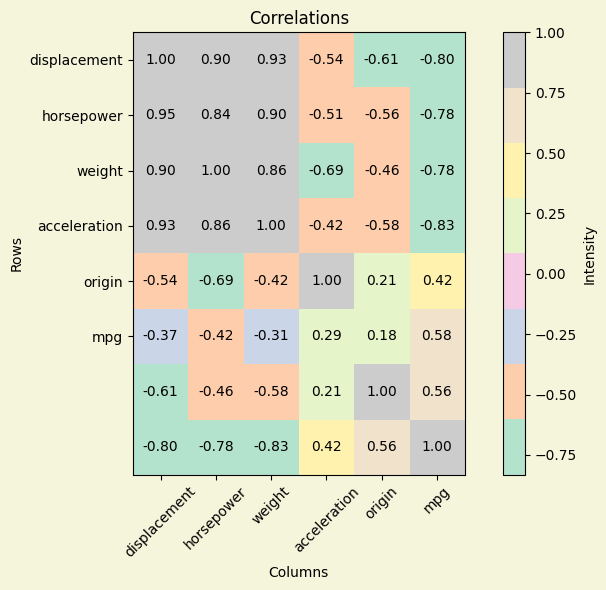

In [ ]:
data= dataframe.corr().iloc[:,[0,2,3,4,6,7]].values
cols=list(filter(lambda e: not e in['cylinders','model_year'], dataframe.columns.values))

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')
cax = plt.imshow(data, cmap='Pastel2', interpolation='nearest')

cbar = plt.colorbar(cax)
cbar.set_label('Intensity')

ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

# Añadir título y etiquetas
plt.xticks(rotation=45)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax.set_title('Correlations')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
displacement,1.000000,0.950721,0.897257,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
cylinders,0.950721,1.000000,0.842983,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
horsepower,0.897257,0.842983,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.932824,0.896017,0.864538,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.543684,-0.505419,-0.689196,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.370164,-0.348746,-0.416361,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.609409,-0.562543,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.804203,-0.775396,-0.778427,-0.831741,0.420289,0.579267,0.563450,1.000000


In [ ]:
data= dataframe.corr().iloc[:,[0,2,3,4,6,7]].values

In [ ]:
data

array([[ 1.        ,  0.897257  ,  0.93282415, -0.54368408, -0.6094094 ,
        -0.80420282],
       [ 0.95072139,  0.84298336,  0.8960168 , -0.50541949, -0.56254335,
        -0.77539629],
       [ 0.897257  ,  1.        ,  0.86453774, -0.68919551, -0.45517145,
        -0.77842678],
       [ 0.93282415,  0.86453774,  1.        , -0.41745732, -0.58102391,
        -0.83174093],
       [-0.54368408, -0.68919551, -0.41745732,  1.        ,  0.20587301,
         0.42028891],
       [-0.37016416, -0.41636148, -0.30656433,  0.28813695,  0.1806622 ,
         0.57926713],
       [-0.6094094 , -0.45517145, -0.58102391,  0.20587301,  1.        ,
         0.56345036],
       [-0.80420282, -0.77842678, -0.83174093,  0.42028891,  0.56345036,
         1.        ]])

In [ ]:
cols=list(filter(lambda e: not e in['cylinders','model_year'], dataframe.columns.values))


['displacement', 'horsepower', 'weight', 'acceleration', 'origin', 'mpg']

In [ ]:
col

Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')